<a href="https://colab.research.google.com/github/rajeshmore1/K-means-Wine-Data-GL-/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [17]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Ved 27 Sept/Part2 - Company.xlsx")

In [18]:
df.sample(5)

,A,B,C,D,Quality
1,174,133,134,166,Quality B
42,48,68,98,51,Quality A
43,169,184,200,133,Quality B
58,88,39,9,102,NaN
54,70,96,70,103,Quality A


## Guide
Target variable of the existing dataset has missing values.
Use the dataset ( ignore the existing target ) to generate clusters ( new potential target )

Compare the clusters with the existing target and find if they follow similar pattern.

If you find a similar pattern replace the newly predicted cluster with original missing targets from dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [20]:
df.describe()

,A,B,C,D
count,61.00,61.00,61.00,61.00
mean,118.56,116.64,114.08,114.46
std,61.77,57.90,65.62,63.14
min,3.00,5.00,3.00,3.00
25%,61.00,63.00,59.00,51.00
50%,136.00,138.00,135.00,132.00
75%,171.00,168.00,174.00,174.00
max,200.00,200.00,200.00,199.00


In [21]:
# Checking skewness
df.skew()

A   -0.36
B   -0.42
C   -0.37
D   -0.27
dtype: float64

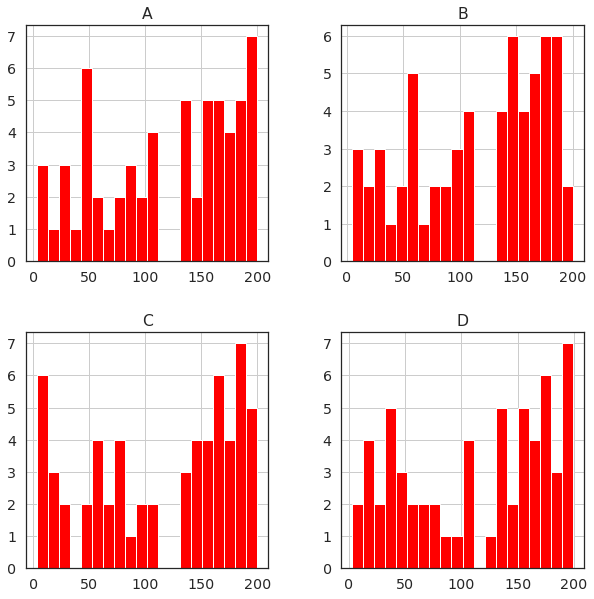

In [22]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,10)})
ax=df.hist(bins=20,color='red' )

In [23]:
df2 = df.drop(['Quality'], axis = 1)

In [24]:
df2.sample(3)

,A,B,C,D
3,61,23,3,44
39,102,5,59,72
23,171,185,181,183


In [25]:
import sklearn.cluster as cluster

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 15.54it/s]


In [27]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df2)
    silhouette[i] = silhouette_score(df2, kmeans.labels_, metric='euclidean')


100%|██████████| 8/8 [00:00<00:00, 12.98it/s]


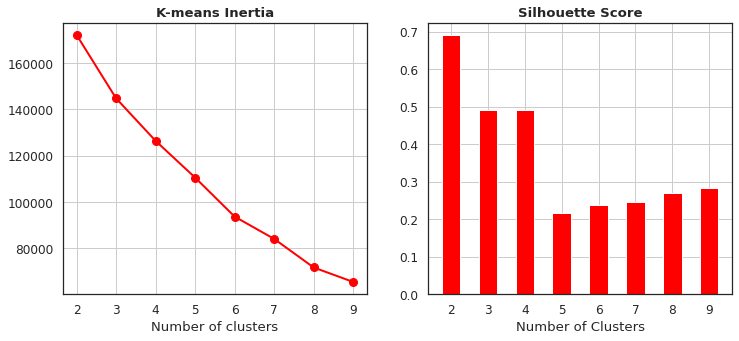

In [28]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

In [31]:
# As we can see, in K=2 all the metrics indicates that it is the best clusters number. So, we'll be using it
kmeans = cluster.KMeans(n_clusters=2,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(df2)

centroids = kmeans.cluster_centers_
#centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

1    33
0    28
dtype: int64

In [32]:
df.Quality.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

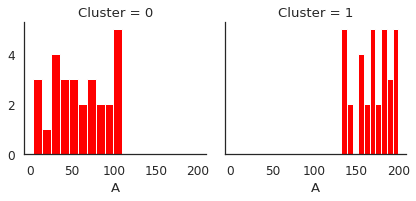

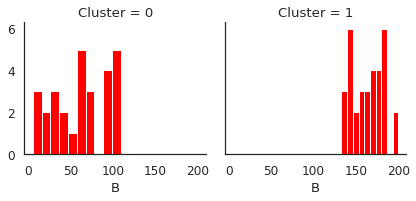

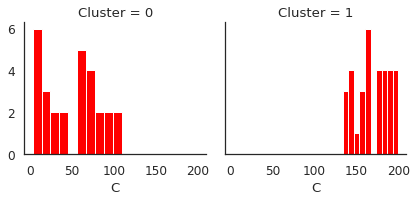

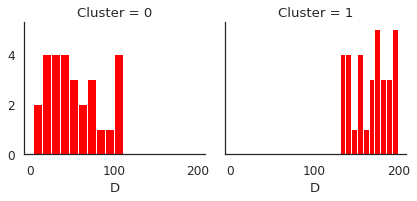

In [35]:
data2=df2.copy()
data2['Cluster']=kmeans_labels

aux=data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

# Using Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()


In [38]:
cluster_ = df2.copy()


In [39]:
cluster_[cluster_.columns] = scale.fit_transform(cluster_)


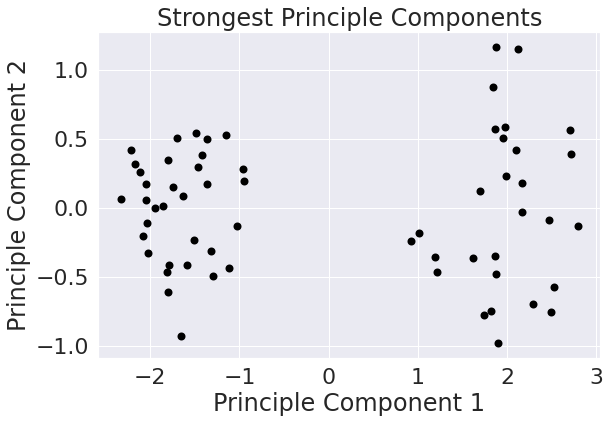

In [41]:
from sklearn.decomposition import PCA
import seaborn as sb

pca = PCA(2)
pca_result = pca.fit_transform(cluster_) 
sb.set(style="darkgrid", rc={'figure.figsize':(9,6)}, font_scale=2)
plt.scatter(x=pca_result[:,0], y=pca_result[:,1], color="black", lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Strongest Principle Components")
plt.show()

In [42]:
import sklearn.cluster as cluster

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(cluster_)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 17.79it/s]


In [43]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(cluster_)
    silhouette[i] = silhouette_score(cluster_, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 13.50it/s]


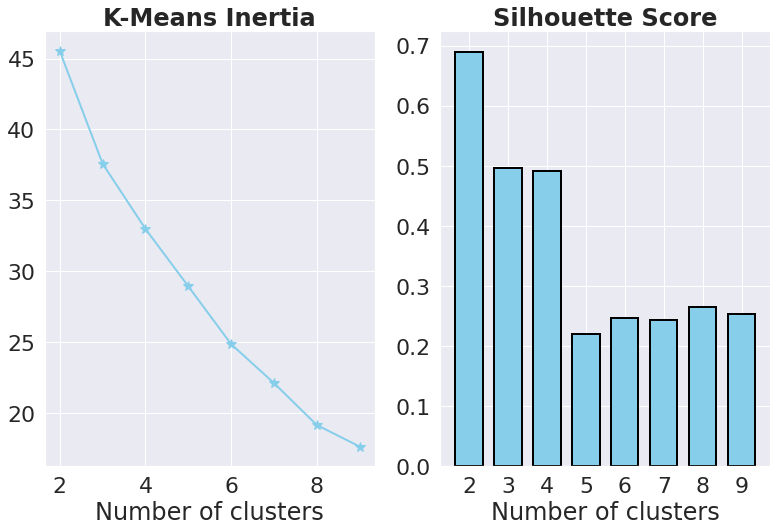

In [44]:
sb.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

In [45]:
kmeans= cluster.KMeans(n_clusters=2, random_state=17, init='k-means++')
kmeans_labels = kmeans.fit_predict(cluster_)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
pd.Series(kmeans_labels).value_counts()

1    33
0    28
dtype: int64

Text(0.5, 1.0, 'Clustered Data')

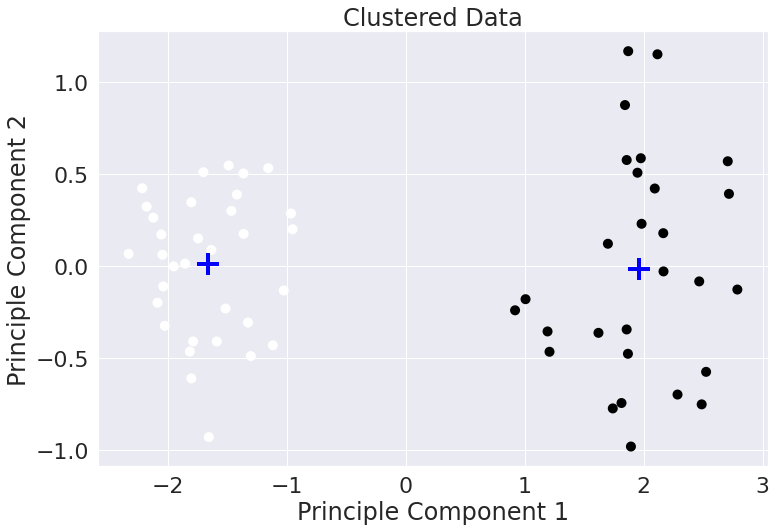

In [46]:
sb.set(style='darkgrid', rc={'figure.figsize':(12,8)},font_scale=2)
plt.scatter(x=pca_result[:,0], y=pca_result[:,1], c=kmeans_labels, cmap="CMRmap", lw=4)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Clustered Data")

NameError: ignored

In [48]:
kmeans_labels

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

In [73]:
df_labels = pd.DataFrame(kmeans_labels)
df_labels
df_labels.to_excel('New_labels.xlsx', index=None)


In [74]:
df_new = pd.read_excel("New_labels.xlsx")

In [75]:
df_new.head()

,0
0,0
1,1
2,1
3,0
4,0


In [79]:
# concatenating df1 and df2 along rows
final_df = pd.concat([df, df_new], axis=1)

In [82]:
final_df.head(15)

,A,B,C,D,Quality,0
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
5,153,140,154,199,NaN,1
6,34,28,78,22,Quality A,0
7,191,144,143,154,NaN,1
8,160,181,194,178,Quality B,1
9,145,178,158,141,NaN,1


In [81]:
final_df.shape

(61, 6)